In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6201,6458-CYIDZ,Female,1,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.70,374.8,No
1472,9283-LZQOH,Male,0,Yes,Yes,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.40,896.75,Yes
2244,0866-QLSIR,Female,0,No,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,Yes
2939,8802-UNOJF,Male,1,No,No,12,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,83.80,1029.75,Yes
411,4163-NCJAK,Female,0,Yes,No,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.45,1066.15,No


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
517400/df.shape[0]

73.46301292063042

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#total charges is object not float

In [9]:
df.TotalCharges.values
#it's string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [15]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


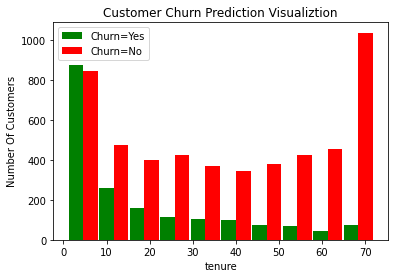

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

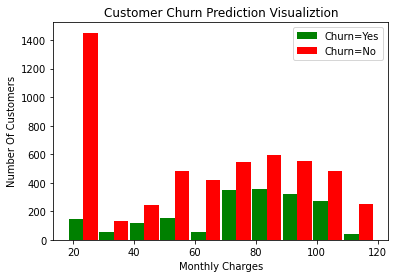

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [25]:
print_unique_col_values(df1)



gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [26]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [27]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [28]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [29]:
df1.gender.unique()


array([1, 0], dtype=int64)

In [30]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [31]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3049,1,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
559,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
214,0,1,1,0,23,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4317,1,0,0,1,3,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2854,0,0,1,1,17,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [32]:
df2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [33]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [35]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)
#stratify=y to be sure that data is divided to train and test correctly not all churn=1 in train and churn=0 in test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()


0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [37]:
y.value_counts()


0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [38]:
5163/1869


2.7624398073836276

In [39]:
y_test.value_counts()


0.0    1033
1.0     374
Name: Churn, dtype: int64

In [40]:
X_train.shape


(5625, 26)

In [41]:
X_test.shape


(1407, 26)

In [42]:
X_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [43]:
X_train[:10]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [44]:
pip install tensorflow-addons


Note: you may need to restart the kernel to use updated packages.


In [45]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7323
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7540
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7892
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.7964
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7991
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.7995
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8030
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4135 - accuracy: 0.8034
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4099 - accura

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [50]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [52]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6179 - accuracy: 0.6716
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7592
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.7692
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7645
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7712
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7769
Epoch 11/

In [53]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [54]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [56]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7482
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4889 - accuracy: 0.7654
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.7692
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7723
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4729 - accuracy: 0.7759
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7785
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4646 - accuracy: 0.7788
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7817
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7831
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4562 - accura

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [59]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
X_sm, y_sm = oversample.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
y_train.value_counts()


1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.7467
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4718 - accuracy: 0.7719
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7751
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.7778
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4569 - accuracy: 0.7817
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4528 - accuracy: 0.7815
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.7863
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4461 - accuracy: 0.7873
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.7915
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4394 - accura

In [65]:
df2.Churn.value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [69]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [70]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [71]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [72]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.6739
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7515
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7656
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7699
Epoch 11/

In [73]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6319 - accuracy: 0.6492
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7498
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7545
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7612
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7629
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7619
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7642
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.7709
Epoch 11/

In [74]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6831
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7567
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7598
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4887 - accuracy: 0.7651
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7704
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7719
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7693
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7757
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7700
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7780
Epoch 11/

In [75]:
len(y_pred1)

1407

In [76]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [77]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)


              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1033
           1       0.46      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.79      0.70      0.71      1407

